La empresa está interesada en hacer crecer el canal de venta online, para eso es necesario entender cuáles son los factores determinantes para que una venta se realice por medio de ese canal. Se sugiere utilizar *Random Forest* como modelo para clasificación de ventas online.

Se dispoinibilizan los siguientes datasets:
* Venta.csv
* Productos.csv
* Sucursales.csv
* Clientes.csv

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

In [2]:
from IPython.display import clear_output

Se utiliza el archivo de ventas procesado:

In [8]:
df_ventas = pd.read_csv("../Datasets/Venta.csv", sep=",", parse_dates=["Fecha"])

In [9]:
df_ventas.head()

,IdVenta,Fecha,Fecha_Entrega,IdCanal,IdCliente,IdSucursal,IdEmpleado,IdProducto,Precio,Cantidad
0,1,2018-03-09,2018-03-17,3,969,13,1674,42817,813.12,2.0
1,2,2018-12-28,2018-12-29,2,884,13,1674,42795,543.18,3.0
2,3,2016-03-28,2016-03-31,2,1722,13,1674,42837,430.32,1.0
3,4,2017-10-23,2017-10-24,3,2876,13,1674,42834,818.84,2.0
4,5,2017-11-22,2017-11-25,2,678,13,1674,42825,554.18,3.0


In [10]:
df_ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46645 entries, 0 to 46644
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   IdVenta        46645 non-null  int64         
 1   Fecha          46645 non-null  datetime64[ns]
 2   Fecha_Entrega  46645 non-null  object        
 3   IdCanal        46645 non-null  int64         
 4   IdCliente      46645 non-null  int64         
 5   IdSucursal     46645 non-null  int64         
 6   IdEmpleado     46645 non-null  int64         
 7   IdProducto     46645 non-null  int64         
 8   Precio         45721 non-null  float64       
 9   Cantidad       45753 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(6), object(1)
memory usage: 3.6+ MB


In [11]:
df_ventas.shape

(46645, 10)

In [12]:
import datetime as dt
df_ventas['Fecha']=df_ventas['Fecha'].map(dt.datetime.toordinal)
df_ventas.head(3)

,IdVenta,Fecha,Fecha_Entrega,IdCanal,IdCliente,IdSucursal,IdEmpleado,IdProducto,Precio,Cantidad
0,1,736762,2018-03-17,3,969,13,1674,42817,813.12,2.0
1,2,737056,2018-12-29,2,884,13,1674,42795,543.18,3.0
2,3,736051,2016-03-31,2,1722,13,1674,42837,430.32,1.0


Se dejan las columnas que se van a utilizar, pero salvando Ids de Producto, Cliente y Sucursal todavía:

In [13]:
df_ventas.drop(['IdVenta','Fecha_Entrega','IdEmpleado'], axis=1,inplace=True)

In [14]:
df_ventas.head()

,Fecha,IdCanal,IdCliente,IdSucursal,IdProducto,Precio,Cantidad
0,736762,3,969,13,42817,813.12,2.0
1,737056,2,884,13,42795,543.18,3.0
2,736051,2,1722,13,42837,430.32,1.0
3,736625,3,2876,13,42834,818.84,2.0
4,736655,2,678,13,42825,554.18,3.0


Se lee el maestro de Clientes para obtener la latitud, longitud y edad

In [15]:
df_clientes = pd.read_csv("../Datasets/Clientes.csv", sep=";")

In [16]:
df_clientes.drop(['Provincia','Nombre_y_Apellido','Domicilio','Telefono','Localidad','col10'], axis=1,inplace=True)

Se lle el maestro de Sucursales para obtener latitud y longitud

In [17]:
df_sucursales = pd.read_csv("../Datasets/Sucursales.csv", sep=";")

In [18]:
df_sucursales.drop(['Provincia','Sucursal','Direccion','Localidad'], axis=1,inplace=True)

In [19]:
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3407 entries, 0 to 3406
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      3407 non-null   int64 
 1   Edad    3407 non-null   int64 
 2   X       3345 non-null   object
 3   Y       3347 non-null   object
dtypes: int64(2), object(2)
memory usage: 106.6+ KB


In [20]:
df_sucursales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        31 non-null     int64 
 1   Latitud   31 non-null     object
 2   Longitud  31 non-null     object
dtypes: int64(1), object(2)
memory usage: 872.0+ bytes


Se puede utilizar la biblioteca Geopy para obtener la distancia entre el cliente y la sucursal:
    !pip install geopy

In [21]:
!pip install geopy

In [22]:
from geopy.distance import geodesic

In [23]:
punto1 = (-34.6157437, -58.573385) #lat-long de buenos aires
punto2 = (41.909986, 12.3959124) #lat-long de roma

In [24]:
type(punto1)

tuple

In [25]:
print(geodesic(punto1, punto2).km)

11139.019659518188


In [26]:
print(geodesic((-34.6157437, -58.573385), (41.909986, 12.3959124)).km)

11139.019659518188


Se trabaja sobre los dataframes maestros de clientes y sucursales para adecuar nombres de campos y tipos de datos, tambien para hacer tratamiento sobre valores faltantes

In [27]:
df_sucursales.rename(columns = {'ID': 'IdSucursal', 'Latitud': 'Lat_Sucursal', 'Longitud': 'Lon_Sucursal'}, inplace = True)

In [28]:
df_sucursales['Lat_Sucursal'] = df_sucursales.apply(lambda row: str(row['Lat_Sucursal']).replace(',','.'), axis=1)
df_sucursales['Lon_Sucursal'] = df_sucursales.apply(lambda row: str(row['Lon_Sucursal']).replace(',','.'), axis=1)

In [29]:
df_sucursales = df_sucursales.astype({"Lat_Sucursal": np.float16, "Lon_Sucursal": np.float16})

In [30]:
df_sucursales.describe()

,IdSucursal,Lat_Sucursal,Lon_Sucursal
count,31.000000,31.000000,31.000000
mean,16.000000,-34.250000,-60.375000
std,9.092121,2.347656,3.753906
min,1.000000,-41.125000,-71.312500
25%,8.500000,-34.656250,-60.687500
50%,16.000000,-34.625000,-58.468750
75%,23.500000,-33.734375,-58.406250
max,31.000000,-26.812500,-57.531250


In [31]:
df_clientes.dropna(inplace=True)

In [32]:
df_clientes.shape

(3333, 4)

In [33]:
df_clientes.rename(columns = {'ID': 'IdCliente', 'Y': 'Lat_Cliente', 'X': 'Lon_Cliente'}, inplace = True)

In [34]:
df_clientes['Lat_Cliente'] = df_clientes.apply(lambda row: str(row['Lat_Cliente']).replace(',','.'), axis=1)
df_clientes['Lon_Cliente'] = df_clientes.apply(lambda row: str(row['Lon_Cliente']).replace(',','.'), axis=1)

In [35]:
df_clientes = df_clientes.astype({"Lat_Cliente": np.float16, "Lon_Cliente": np.float16})

In [36]:
df_clientes.describe()

,IdCliente,Edad,Lon_Cliente,Lat_Cliente
count,3333.000000,3333.000000,3333.000000,3333.000000
mean,1710.688269,40.412241,-inf,-inf
std,985.695497,14.577355,14.320312,8.640625
min,1.000000,15.000000,-71.500000,-68.812500
25%,858.000000,28.000000,-60.906250,-34.718750
50%,1721.000000,41.000000,-58.625000,-34.593750
75%,2567.000000,53.000000,-58.437500,-32.937500
max,3407.000000,65.000000,58.843750,34.937500


Como vemos que hay problemas en los datos, es decir, valores de latitud y longitud que no corresponden a Argentina, se procede a hacer correcciones, las cuáles serán de dos tipos:
* Casos donde la latitud y longitud están en positivo
* Casos donde la latitud y longitud están intercambiadas

In [37]:
df_clientes['Lon_Cliente'] = df_clientes['Lon_Cliente'].apply(lambda x: x if x < 0 else x * -1)
df_clientes['Lat_Cliente'] = df_clientes['Lat_Cliente'].apply(lambda x: x if x < 0 else x * -1)

In [38]:
df_clientes.describe()

,IdCliente,Edad,Lon_Cliente,Lat_Cliente
count,3333.000000,3333.000000,3333.000000,3333.000000
mean,1710.688269,40.412241,-60.300119,-34.080202
std,985.695497,14.577355,4.621252,3.609896
min,1.000000,15.000000,-71.500000,-68.812500
25%,858.000000,28.000000,-60.906250,-34.718750
50%,1721.000000,41.000000,-58.656250,-34.593750
75%,2567.000000,53.000000,-58.437500,-32.968750
max,3407.000000,65.000000,-26.734375,-26.593750


In [39]:
df_clientes['Lat_Cliente_Aux'] = df_clientes['Lat_Cliente']

In [40]:
df_clientes['Lat_Cliente'] = df_clientes.apply(lambda row: row['Lat_Cliente'] if row['Lat_Cliente_Aux'] > -55 else row['Lon_Cliente'], axis=1)

In [41]:
df_clientes['Lon_Cliente'] = df_clientes.apply(lambda row: row['Lon_Cliente'] if row['Lat_Cliente_Aux'] > -55 else row['Lat_Cliente_Aux'], axis=1)

In [42]:
df_clientes.describe()

,IdCliente,Edad,Lon_Cliente,Lat_Cliente,Lat_Cliente_Aux
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,1710.688269,40.412241,-60.633935,-33.746386,-34.080202
std,985.695497,14.577355,3.563706,1.988432,3.609896
min,1.000000,15.000000,-71.500000,-40.375000,-68.812500
25%,858.000000,28.000000,-63.968750,-34.718750,-34.718750
50%,1721.000000,41.000000,-58.656250,-34.593750,-34.593750
75%,2567.000000,53.000000,-58.437500,-32.968750,-32.968750
max,3407.000000,65.000000,-57.750000,-26.593750,-26.593750


In [43]:
df_clientes.drop(columns=['Lat_Cliente_Aux'], inplace=True)

Se agrega en el dataframe de ventas los datos de geoposición y edad

In [44]:
df_ventas = pd.merge(df_ventas, df_clientes, on='IdCliente', how='left')

In [45]:
df_ventas = pd.merge(df_ventas, df_sucursales, on='IdSucursal', how='left')

In [46]:
df_ventas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46645 entries, 0 to 46644
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Fecha         46645 non-null  int64  
 1   IdCanal       46645 non-null  int64  
 2   IdCliente     46645 non-null  int64  
 3   IdSucursal    46645 non-null  int64  
 4   IdProducto    46645 non-null  int64  
 5   Precio        45721 non-null  float64
 6   Cantidad      45753 non-null  float64
 7   Edad          45445 non-null  float64
 8   Lon_Cliente   45445 non-null  float64
 9   Lat_Cliente   45445 non-null  float64
 10  Lat_Sucursal  46645 non-null  float16
 11  Lon_Sucursal  46645 non-null  float16
dtypes: float16(2), float64(5), int64(5)
memory usage: 4.1 MB


Los valores nulos pueden ser descartados o bien imputados con otro valor

In [42]:
#df_ventas['Edad'] = df_ventas['Edad'].fillna(0)
#df_ventas['Lon_Cliente'] = df_ventas['Lon_Cliente'].fillna(0)
#df_ventas['Lat_Cliente'] = df_ventas['Lat_Cliente'].fillna(0)

In [47]:
df_ventas.dropna(inplace=True)
df_ventas.shape

(43701, 12)

Se genera el campo donde va a estar la distancia del cliente con la sucursal, que es la geodésica entre los dos puntos de coordenadas

In [48]:
df_ventas['Dist_Cli_Suc'] = df_ventas.apply(lambda row: geodesic((row['Lat_Cliente'], row['Lon_Cliente']),(row['Lat_Sucursal'], row['Lon_Sucursal'])).km, axis=1)

In [49]:
df_ventas.describe()

,Fecha,IdCanal,IdCliente,IdSucursal,IdProducto,Precio,Cantidad,Edad,Lon_Cliente,Lat_Cliente,Lat_Sucursal,Lon_Sucursal,Dist_Cli_Suc
count,43701.000000,43701.000000,43701.000000,43701.000000,43701.000000,4.370100e+04,43701.000000,43701.000000,43701.000000,43701.00000,4.370100e+04,4.370100e+04,43701.000000
mean,736726.215144,2.015011,1511.788861,14.764262,42901.456328,5.944579e+03,2.385415,40.479394,-60.452026,-34.03451,-inf,-inf,330.783656
std,639.336426,0.743056,976.360387,8.881062,83.711370,2.554680e+05,3.577445,14.614438,3.716123,1.85936,1.688477e+00,3.193359e+00,400.062900
min,735599.000000,1.000000,1.000000,1.000000,42737.000000,3.000000e+00,1.000000,15.000000,-71.500000,-40.37500,-4.112500e+01,-7.131250e+01,0.000000
25%,736177.000000,1.000000,698.000000,7.000000,42833.000000,4.380000e+02,2.000000,28.000000,-59.187500,-34.75000,-3.462500e+01,-6.065625e+01,21.574331
50%,736738.000000,2.000000,1370.000000,14.000000,42902.000000,6.536200e+02,2.000000,41.000000,-58.625000,-34.62500,-3.459375e+01,-5.846875e+01,58.821208
75%,737313.000000,3.000000,2296.000000,23.000000,42974.000000,1.789000e+03,3.000000,53.000000,-58.406250,-34.18750,-3.296875e+01,-5.843750e+01,640.539394
max,737789.000000,3.000000,3407.000000,31.000000,43043.000000,3.373920e+07,300.000000,65.000000,-57.750000,-26.59375,-3.135938e+01,-5.753125e+01,1696.096453


El Canal de venta Online es el IdCanal = 2, se observan los datos con ese filtro

In [50]:
df_ventas[df_ventas['IdCanal'] == 2].describe()

,Fecha,IdCanal,IdCliente,IdSucursal,IdProducto,Precio,Cantidad,Edad,Lon_Cliente,Lat_Cliente,Lat_Sucursal,Lon_Sucursal,Dist_Cli_Suc
count,19563.000000,19563.0,19563.000000,19563.000000,19563.000000,1.956300e+04,19563.000000,19563.000000,19563.000000,19563.000000,1.956300e+04,1.956300e+04,19563.000000
mean,736993.843224,2.0,1506.807034,15.193580,42901.175944,5.538781e+03,2.384348,40.665235,-60.448782,-34.032975,-inf,-inf,344.647767
std,578.103598,0.0,980.328717,8.792371,83.182130,2.283104e+05,3.471878,14.649029,3.710042,1.849625,1.870117e+00,3.177734e+00,399.529693
min,735599.000000,2.0,1.000000,1.000000,42737.000000,3.000000e+00,1.000000,15.000000,-71.500000,-40.375000,-4.112500e+01,-7.131250e+01,0.000000
25%,736566.000000,2.0,681.000000,7.000000,42833.000000,4.380000e+02,2.000000,28.000000,-59.187500,-34.750000,-3.465625e+01,-6.065625e+01,22.509007
50%,737119.000000,2.0,1359.000000,15.000000,42902.000000,6.536200e+02,2.000000,41.000000,-58.625000,-34.625000,-3.462500e+01,-5.843750e+01,72.833233
75%,737493.000000,2.0,2300.000000,23.000000,42973.000000,1.789000e+03,3.000000,54.000000,-58.406250,-34.156250,-3.450000e+01,-5.840625e+01,638.762239
max,737789.000000,2.0,3407.000000,31.000000,43043.000000,2.458000e+07,200.000000,65.000000,-57.750000,-26.593750,-3.135938e+01,-5.753125e+01,1696.096453


In [51]:
df_ventas['VentaOnline'] = df_ventas.apply(lambda row: 1 if row['IdCanal'] == 2 else 0, axis=1)

Del maestro de Productos, se obtiene el tipo de producto

In [52]:
df_productos = pd.read_csv("../Datasets/Productos.csv", sep=",", encoding="ansi")

In [53]:
df_productos.drop(['Concepto','Precio'], axis=1,inplace=True)

In [54]:
df_productos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291 entries, 0 to 290
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID_PRODUCTO  291 non-null    int64 
 1   Tipo         279 non-null    object
dtypes: int64(1), object(1)
memory usage: 4.7+ KB


In [55]:
df_productos.rename(columns = {'ID_PRODUCTO': 'IdProducto'}, inplace = True)

In [56]:
df_productos.dropna(inplace=True)

In [57]:
df_productos.Tipo.unique()

array(['IMPRESIÓN', 'INFORMATICA', 'GRABACION', 'GABINETES', 'AUDIO',
       'GAMING', 'LIMPIEZA', 'BASES', 'VARIOS', 'ESTUCHERIA'],
      dtype=object)

In [58]:
from sklearn import preprocessing

In [59]:
le = preprocessing.LabelEncoder()

In [60]:
df_productos['IdTipoProducto'] = le.fit_transform(df_productos.Tipo.values)

In [61]:
df_productos.head()

,IdProducto,Tipo,IdTipoProducto
0,42737,IMPRESIÓN,6
1,42754,INFORMATICA,7
2,42755,INFORMATICA,7
3,42756,INFORMATICA,7
4,42757,INFORMATICA,7


In [62]:
df_productos.drop(['Tipo'], axis=1,inplace=True)

In [64]:
df_ventas = pd.merge(df_ventas, df_productos, on='IdProducto', how='left')

In [65]:
df_ventas.dropna(inplace = True)

In [66]:
df_ventas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43095 entries, 0 to 43700
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Fecha           43095 non-null  int64  
 1   IdCanal         43095 non-null  int64  
 2   IdCliente       43095 non-null  int64  
 3   IdSucursal      43095 non-null  int64  
 4   IdProducto      43095 non-null  int64  
 5   Precio          43095 non-null  float64
 6   Cantidad        43095 non-null  float64
 7   Edad            43095 non-null  float64
 8   Lon_Cliente     43095 non-null  float64
 9   Lat_Cliente     43095 non-null  float64
 10  Lat_Sucursal    43095 non-null  float16
 11  Lon_Sucursal    43095 non-null  float16
 12  Dist_Cli_Suc    43095 non-null  float64
 13  VentaOnline     43095 non-null  int64  
 14  IdTipoProducto  43095 non-null  float64
dtypes: float16(2), float64(7), int64(6)
memory usage: 4.8 MB


In [67]:
df_ventas.head()

,Fecha,IdCanal,IdCliente,IdSucursal,IdProducto,Precio,Cantidad,Edad,Lon_Cliente,Lat_Cliente,Lat_Sucursal,Lon_Sucursal,Dist_Cli_Suc,VentaOnline,IdTipoProducto
0,736762,3,969,13,42817,813.12,2.0,60.0,-58.28125,-34.81250,-34.59375,-58.5625,35.395419,0,3.0
1,737056,2,884,13,42795,543.18,3.0,64.0,-58.31250,-34.78125,-34.59375,-58.5625,30.942664,1,7.0
2,736051,2,1722,13,42837,430.32,1.0,16.0,-58.81250,-34.65625,-34.59375,-58.5625,23.951147,1,0.0
3,736625,3,2876,13,42834,818.84,2.0,19.0,-68.87500,-32.93750,-34.59375,-58.5625,972.361210,0,0.0
4,736655,2,678,13,42825,554.18,3.0,37.0,-58.65625,-34.71875,-34.59375,-58.5625,16.313885,1,3.0


In [68]:
def plot_corre_heatmap(corr):
    '''
    Definimos una función para ayudarnos a graficar un heatmap de correlación
    '''
    plt.figure(figsize=(12,10))
    sns.heatmap(corr, cbar = True,  square = False, annot=True, fmt= '.2f'
                ,annot_kws={'size': 15},cmap= 'coolwarm')
    plt.xticks(rotation = 45)
    plt.yticks(rotation = 45)
    # Arreglamos un pequeño problema de visualización
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show()

Se analiza la correlación entre las variables

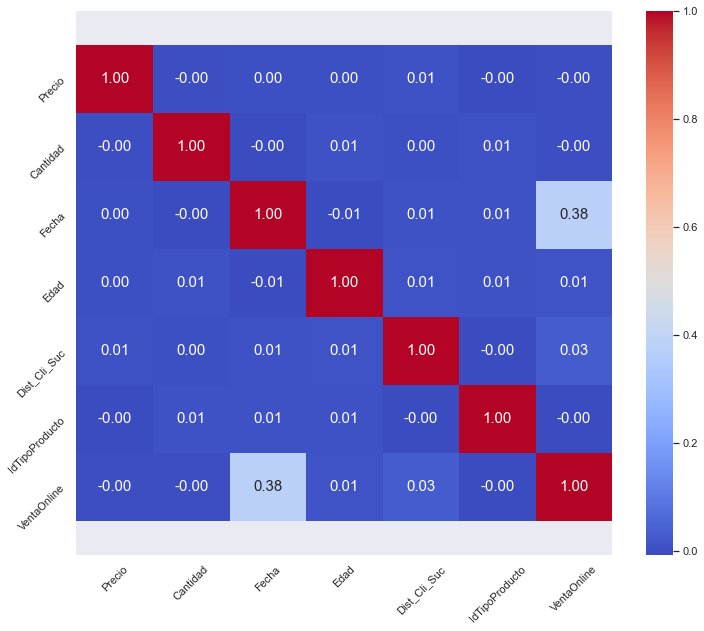

In [69]:
corr = df_ventas[['Precio','Cantidad','Fecha','Edad','Dist_Cli_Suc','IdTipoProducto','VentaOnline']].corr()
plot_corre_heatmap(corr)

Se analiza la distribución entre ventas online y el resto

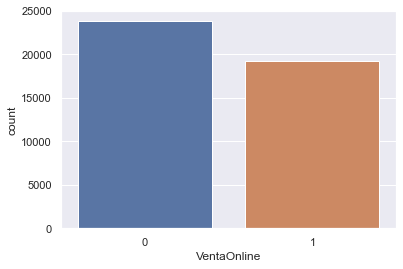

In [70]:
sns.countplot(x='VentaOnline', data=df_ventas) #equivelante a sns.countplot(df_ventas.VentaOnline)
plt.show()

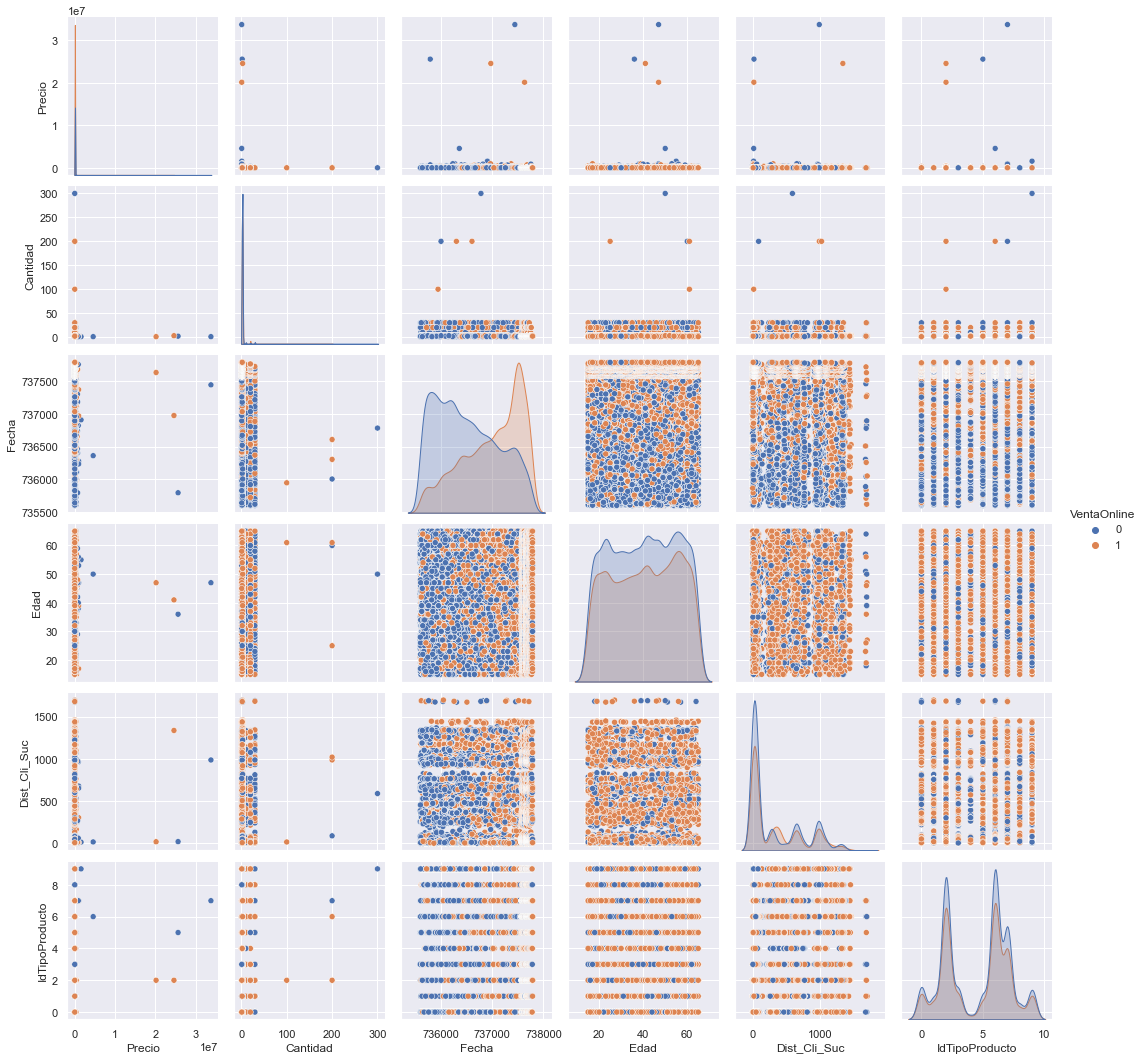

In [71]:
sns.pairplot(df_ventas[['Precio','Cantidad','Fecha','Edad','Dist_Cli_Suc','IdTipoProducto','VentaOnline']], hue = 'VentaOnline')
plt.show()

Se generan los datos con los que se va a entrenar Random Forest

In [72]:
X = df_ventas[['Precio','Cantidad','Fecha','Edad','Dist_Cli_Suc','IdTipoProducto']]
y = df_ventas[['VentaOnline']]

In [73]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
from sklearn.model_selection import learning_curve

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify = y)

In [75]:
from sklearn.ensemble import RandomForestClassifier

Se evaluan distintos hiperparámetros, analizando la curva de validación y de aprendizaje

In [76]:
train_accuracy = []
test_accuracy = []
oob_scores = []

N_estimadores = [2,50,100,150,200,250,300]
i = 0
i_max = len(N_estimadores)
for estimadores in N_estimadores:
    i = i + 1
    clf = RandomForestClassifier(n_estimators=estimadores, n_jobs=-1, oob_score= True, random_state = 42)
    clf.fit(X_train,y_train)
    
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    train_accuracy.append(metrics.accuracy_score(y_train, y_train_pred))
    test_accuracy.append(metrics.accuracy_score(y_test, y_test_pred))
    oob_scores.append(clf.oob_score_)
    
    clear_output(wait=True)
    print('Completado: ' + str(round(i / i_max * 100, 2)) + '%')
    
train_accuracy = np.array(train_accuracy)
test_accuracy = np.array(test_accuracy)
oob_scores = np.array(oob_scores)

Completado: 100.0%


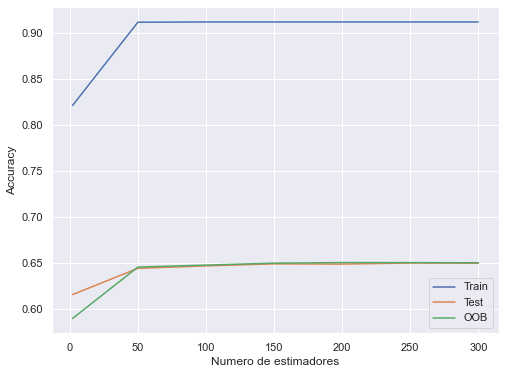

In [77]:
plt.figure(figsize = (8,6))
plt.plot(N_estimadores, train_accuracy, label = 'Train')
plt.plot(N_estimadores, test_accuracy, label = 'Test')
plt.plot(N_estimadores, oob_scores, label = 'OOB')
plt.xlabel('Numero de estimadores')
plt.ylabel('Accuracy')
plt.legend()
# plt.xlim(0,50)
plt.show()

In [78]:
clf = RandomForestClassifier(n_estimators=50, n_jobs=-1, oob_score= True, random_state = 42)

train_sizes, train_scores, valid_scores = learning_curve(clf, X_train, y_train, 
                                                         train_sizes = np.linspace(0.0001,1,10),
                                                         scoring = 'accuracy', cv=5)

C:\Users\lopez\miniconda3\envs\datascience\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\lopez\miniconda3\envs\datascience\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\lopez\miniconda3\envs\datascience\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\lopez\miniconda3\envs\datascience\lib\site-packages\sklearn\model_s

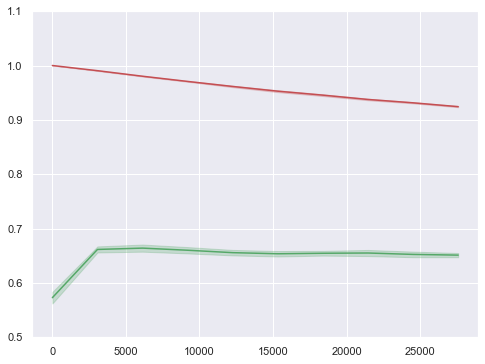

In [79]:
plt.figure(figsize = (8,6))
plt.plot(train_sizes, train_scores.mean(axis = 1), color = 'r')
plt.plot(train_sizes, valid_scores.mean(axis = 1), color = 'g')

plt.fill_between(train_sizes, train_scores.mean(axis = 1)- train_scores.std(axis = 1),
                     train_scores.mean(axis = 1)+ train_scores.std(axis = 1), alpha=0.25,
                     color="r")
plt.fill_between(train_sizes, valid_scores.mean(axis = 1) - valid_scores.std(axis = 1),
                     valid_scores.mean(axis = 1) + valid_scores.std(axis = 1), alpha=0.25, color="g")

plt.ylim(0.5,1.1)
plt.show()

A partir de un clasificador de 100 árboles, se realiza el entrenamiento y se observan los resultados

In [80]:
clf = RandomForestClassifier(n_estimators=100, max_features='sqrt', n_jobs=-1, oob_score = True, random_state = 42)
clf.fit(X_train,y_train)

C:\Users\lopez\AppData\Local\Temp\ipykernel_24344\1202341541.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)


RandomForestClassifier(max_features='sqrt', n_jobs=-1, oob_score=True,
                       random_state=42)

In [81]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
print(metrics.accuracy_score(y_train, y_train_pred))
print(metrics.accuracy_score(y_test, y_test_pred))

0.9115906717716672
0.6464787098271261


In [82]:
clf.feature_importances_

array([0.14806488, 0.11456323, 0.34165516, 0.12692806, 0.21943185,
       0.04935682])

C:\Users\lopez\miniconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


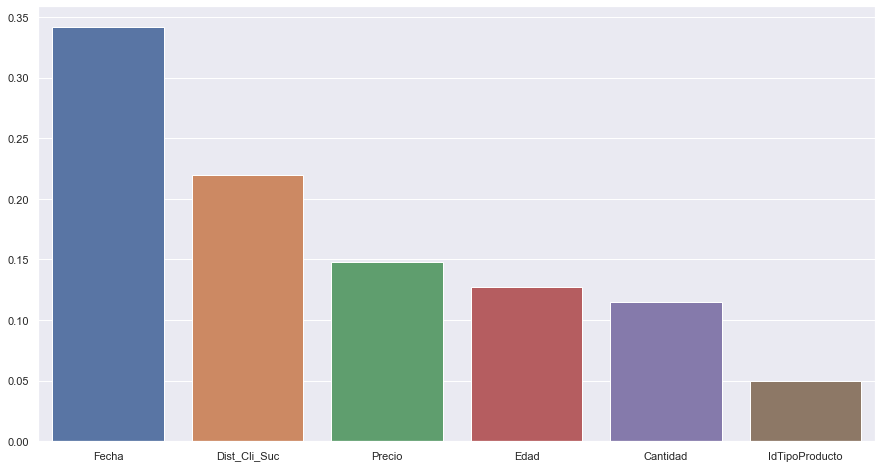

In [83]:
importances = clf.feature_importances_
columns = X_train.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize = (15,8))
sns.barplot(columns[indices], importances[indices])
plt.show()

Las variables fecha y distancia entre cliente y sucursal, resulta ser la más determinante para Random Forest, seguida de Precio y Edad